In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [2]:
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
data = pd.read_csv('data.csv')
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = len(X)

In [0]:
L = 0.0001#learning rate
h = 1.5#hyperparameter value
epoch = 100

In [0]:
w = 1;b = 0;
errors = [];

# here now we train the model. hurrah!
def l1_learning():
  global w,b
  for i in range(epoch):
    if w is 0:
      break
    Y_hat = w*X + b
    errors.append((1/N) * sum(Y - Y_hat)**2 - h * abs(w))
    D_m = (-2/N) * sum(X * (Y - Y_hat)) - h * w / abs(w)
    D_c = (-2/N) * sum(Y - Y_hat) - h
    w = w - L * D_m
    b = b - L * D_c

Here we did L1 Regression (y = wx + b). The loss function is :

```
1/N * sum(y - (wx + b))**2 - h * sum(abs(w))

where h = hyperparameter,
      N = total number of records
```

in order to minimize the loss function, we need to find values if w and b that satisfy the equation best. This can be done by calculating d/dw and d/db on the data. **NOTE** the d/dw cannot be found for values of w = 0. This is because the derivative of *f(x) = |x|* is *f'(x) = x / |x|*:


```
d/dw = -2/N * sum(x * (y - (wx + b))) - h * sum(w / abs(w))

d/db = -2/N * sum(y - (wx + b)) - h
```

We immediately encounter the problem of division by 0 if we have weights which are 0 initially. This can be solved by having weights start at 1 and checking if it gets to 0 and breaking the loop.


w is  1.4792065470906215  and b is 0.030142728622830656


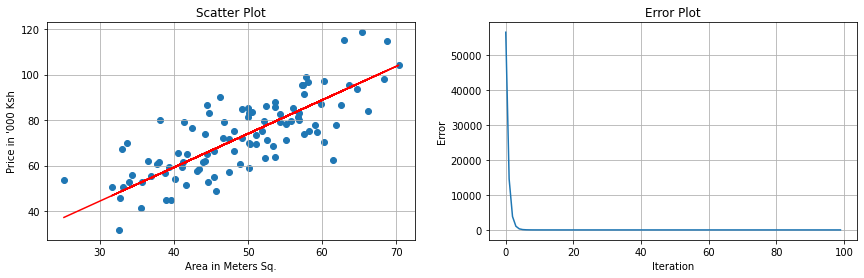

In [8]:
l1_learning()
Y_predicted = w*X + b
print('w is ', w, ' and b is', b)


fig, (plot1, plot2) = plt.subplots(ncols = 2,gridspec_kw={'right':2})

plot1.grid()
plot1.scatter(X, Y)
plot1.plot(X, Y_predicted, color='red')
plot1.set_title('Scatter Plot')
plot1.set_xlabel('Area in Meters Sq.')
plot1.set_ylabel('Price in \'000 Ksh');

plot2.grid()
plot2.plot(list(range(epoch)), errors)
plot2.set_title('Error Plot')
plot2.set_xlabel('Iteration')
plot2.set_ylabel('Error');